In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)

import sys
sys.path.append("../..")
import keras_utils
from keras_utils import reset_tf_session

We're using TF 1.2.1


Using TensorFlow backend.


We are using Keras 2.0.6


In [2]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset_from_file()

X_train [shape (50000, 28, 28)] sample patch:
 [[ 0.          0.29803922  0.96470588  0.98823529  0.43921569]
 [ 0.          0.33333333  0.98823529  0.90196078  0.09803922]
 [ 0.          0.33333333  0.98823529  0.8745098   0.        ]
 [ 0.          0.33333333  0.98823529  0.56862745  0.        ]
 [ 0.          0.3372549   0.99215686  0.88235294  0.        ]]
A closeup of a sample patch:


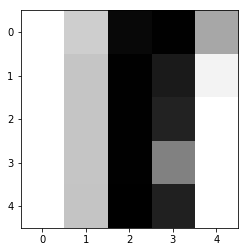

And the whole sample:


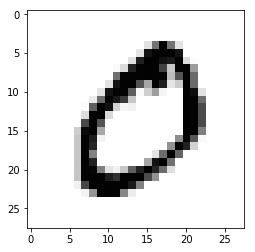

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [3]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [4]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [5]:
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] [5 0 4]


In [6]:
from keras.layers import Activation,Dense
from keras.models import Sequential

In [7]:
s=reset_tf_session()

model=Sequential()
model.add(Dense(256,input_shape=(784,)))
model.add(Activation('sigmoid'))

In [8]:
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.fit(X_train_flat,y_train_oh,batch_size=512,epochs=40,validation_data=(X_val_flat,y_val_oh),callbacks=[keras_utils.TqdmProgressCallback()],verbose=0)


Epoch 1/40


A Jupyter Widget



Epoch 2/40


A Jupyter Widget



Epoch 3/40


A Jupyter Widget



Epoch 4/40


A Jupyter Widget



Epoch 5/40


A Jupyter Widget



Epoch 6/40


A Jupyter Widget



Epoch 7/40


A Jupyter Widget



Epoch 8/40


A Jupyter Widget



Epoch 9/40


A Jupyter Widget



Epoch 10/40


A Jupyter Widget



Epoch 11/40


A Jupyter Widget



Epoch 12/40


A Jupyter Widget



Epoch 13/40


A Jupyter Widget



Epoch 14/40


A Jupyter Widget



Epoch 15/40


A Jupyter Widget



Epoch 16/40


A Jupyter Widget



Epoch 17/40


A Jupyter Widget



Epoch 18/40


A Jupyter Widget



Epoch 19/40


A Jupyter Widget



Epoch 20/40


A Jupyter Widget



Epoch 21/40


A Jupyter Widget



Epoch 22/40


A Jupyter Widget



Epoch 23/40


A Jupyter Widget



Epoch 24/40


A Jupyter Widget



Epoch 25/40


A Jupyter Widget



Epoch 26/40


A Jupyter Widget



Epoch 27/40


A Jupyter Widget



Epoch 28/40


A Jupyter Widget



Epoch 29/40


A Jupyter Widget



Epoch 30/40


A Jupyter Widget



Epoch 31/40


A Jupyter Widget



Epoch 32/40


A Jupyter Widget



Epoch 33/40


A Jupyter Widget



Epoch 34/40


A Jupyter Widget



Epoch 35/40


A Jupyter Widget



Epoch 36/40


A Jupyter Widget



Epoch 37/40


A Jupyter Widget



Epoch 38/40


A Jupyter Widget



Epoch 39/40


A Jupyter Widget



Epoch 40/40


A Jupyter Widget